# 1. Importing Libraries
First we will import libraries that contain the commands we need for webscraping and data analysis.

In [2]:
# Setting up libraries.

from bs4 import BeautifulSoup
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Use the pd.set_option() command so that all rows and columns are displayed when displaying dataframes.

#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

### Web Scraping Test
Web scraping is the process of downloading a web page (a process that web browsers use when displaying a web page) and extracting data from the downloaded web page. The extracted data is then saved in a database or spreadsheet for later retrieval or analysis.

When a web page is scraped, it comes in the form of all HTML codes that make up the web page. To extract data, we must first find the set of HTML codes that contains the data we want. The next few blocks of code are used to scrape the first page and to find the set of codes that pertain to the setup of each review.

In [5]:
# Use the requests.get() command to fetch (download) the webpage.
# Use the .text command to convert the HTML code into text form.
# Use the BeautifulSoup() command to parse the HTML code.

website = 'https://www.airlinequality.com/airline-reviews/british-airways'
result = requests.get(website)
content = result.text
soup = BeautifulSoup(content)

All reviews are under the "article" tag and "review" itemprop. We are only interested in the contents the reviews, so we will extract portions of the HTML code that contains the "article" tag and "review" itemprop.

In [7]:
# The box contains the HTML code for each review.
# Use the find_all command to extract portions of the HTML code with a specified tag.

box = soup.find_all('article', itemprop = "review")
box

[<article class="comp comp_media-review-rated list-item media position-content review-916728" itemprop="review" itemscope="" itemtype="http://schema.org/Review">
 <meta content="2025-01-09" itemprop="datePublished"/>
 <div class="rating-10" itemprop="reviewRating" itemscope="" itemtype="http://schema.org/Rating">
 <span itemprop="ratingValue">1</span>/<span itemprop="bestRating">10</span>
 </div>
 <div class="body" id="anchor916728">
 <h2 class="text_header">"BA refused to reimburse me"</h2>
 <h3 class="text_sub_header userStatusWrapper">
 <span itemprop="author" itemscope="" itemtype="http://schema.org/Person">
 <span itemprop="name">Michael Chastain</span></span> (United States) <time datetime="2025-01-09" itemprop="datePublished">9th January 2025</time></h3>
 <div class="tc_mobile">
 <div class="text_content" itemprop="reviewBody">✅ <strong><a href="https://www.airlinequality.com/verified-reviews/"><em>Trip Verified</em></a></strong> |   British airways lost bags in LHR then found t

### Webscraping
Now that I found which block of code controls the layout for each review, I will create a series of loops to scrape all the data for all reviews.

In [9]:
# Use for loops to scrape all data for all reviews.

website1 = 'https://www.airlinequality.com/airline-reviews/british-airways/page/'
website2 = '/?sortby=post_date%3ADesc&pagesize=350'
true_false = []
rating_list = []
title_list = []
author_list = []
post_date_list = []
text_list = []
aircraft_list = []
traveller_list = []
seat_list = []
route_list = []
fly_date_list = []
recommended_list = []
seat_comfort = []
staff_service = []
food_drinks = []
entertainment = []
ground_service = []
wifi = []
value = []

for page in range(1, 13):
    result = requests.get(website1 + str(page) + website2)
    content = result.text
    soup = BeautifulSoup(content)
    box = soup.find_all('article', itemprop = "review")

    for review in box:
        rating_list.append(review.find_all('span')[0].text)

        title_list.append(review.find('h2', class_ = "text_header").get_text())

        author_list.append(review.find('span', itemprop = "name").get_text())

        post_date_list.append(review.find('time').get_text())
        
        text_list.append(review.find('div', class_ = "text_content").get_text())

    for review in box:
        sub_box = review
        for i in sub_box.find_all('tr'):
            if "Aircraft" in i.get_text():
                aircraft = i.get_text().strip().replace('Aircraft', '')
                true_false.append(1)
            else:
                true_false.append(0)
    
        aircraft_list.append(aircraft if sum(true_false) == 1 else None)
            
        true_false.clear()

        for i in sub_box.find_all('tr'):
            if "Type Of Traveller" in i.get_text():
                traveller = i.get_text().strip().replace('Type Of Traveller', '')
                true_false.append(1)
            else:
                true_false.append(0)
    
        traveller_list.append(traveller if sum(true_false) == 1 else None)
            
        true_false.clear()

        for i in sub_box.find_all('tr'):
            if "Seat Type" in i.get_text():
                seat = i.get_text().strip().replace('Seat Type', '')
                true_false.append(1)
            else:
                true_false.append(0)
    
        seat_list.append(seat if sum(true_false) == 1 else None)
            
        true_false.clear()

        for i in sub_box.find_all('tr'):
            if "Route" in i.get_text():
                route = i.get_text().strip().replace('Route', '')
                true_false.append(1)
            else:
                true_false.append(0)
    
        route_list.append(route if sum(true_false) == 1 else None)
            
        true_false.clear()

        for i in sub_box.find_all('tr'):
            if "Date Flown" in i.get_text():
                fly_date = i.get_text().strip().replace('Date Flown', '')
                true_false.append(1)
            else:
                true_false.append(0)
    
        fly_date_list.append(fly_date if sum(true_false) == 1 else None)
            
        true_false.clear()

        for i in sub_box.find_all('tr'):
            if "Recommended" in i.get_text():
                recommend = i.get_text().strip().replace('Recommended', '')
                true_false.append(1)
            else:
                true_false.append(0)
    
        recommended_list.append(recommend if sum(true_false) == 1 else None)
            
        true_false.clear()

    for review in box:
        sub_box = review
        for i in sub_box.find_all('tr'):
            if "Seat Comfort" in i.get_text():
                star_rating = len(i.find_all('span', class_ = "star fill"))
                true_false.append(1)
            else:
                true_false.append(0)
            
        seat_comfort.append(star_rating if sum(true_false) == 1 else None)
            
        true_false.clear()

        for i in sub_box.find_all('tr'):
            if "Cabin Staff Service" in i.get_text():
                star_rating = len(i.find_all('span', class_ = "star fill"))
                true_false.append(1)
            else:
                true_false.append(0)
            
        staff_service.append(star_rating if sum(true_false) == 1 else None)
            
        true_false.clear()

        for i in sub_box.find_all('tr'):
            if "Food & Beverages" in i.get_text():
                star_rating = len(i.find_all('span', class_ = "star fill"))
                true_false.append(1)
            else:
                true_false.append(0)
            
        food_drinks.append(star_rating if sum(true_false) == 1 else None)
            
        true_false.clear()

        for i in sub_box.find_all('tr'):
            if "Inflight Entertainment" in i.get_text():
                star_rating = len(i.find_all('span', class_ = "star fill"))
                true_false.append(1)
            else:
                true_false.append(0)
            
        entertainment.append(star_rating if sum(true_false) == 1 else None)
            
        true_false.clear()

        for i in sub_box.find_all('tr'):
            if "Ground Service" in i.get_text():
                star_rating = len(i.find_all('span', class_ = "star fill"))
                true_false.append(1)
            else:
                true_false.append(0)

        ground_service.append(star_rating if sum(true_false) == 1 else None)

        true_false.clear()

        for i in sub_box.find_all('tr'):
            if "Wifi & Connectivity" in i.get_text():
                star_rating = len(i.find_all('span', class_ = "star fill"))
                true_false.append(1)
            else:
                true_false.append(0)
            
        wifi.append(star_rating if sum(true_false) == 1 else None)

        true_false.clear()

        for i in sub_box.find_all('tr'):
            if "Value For Money" in i.get_text():
                star_rating = len(i.find_all('span', class_ = "star fill"))
                true_false.append(1)
            else:
                true_false.append(0)

        value.append(star_rating if sum(true_false) == 1 else None)

        true_false.clear()
        
rating_list = [rating if rating.isdigit() else None for rating in rating_list]

In [10]:
# Create dataframe that contains all the data for all reviews.
# Use the .head() command to see the first 5 rows of the dataframe.

df = pd.DataFrame()
df['Rating'] = rating_list
df['Title'] = title_list
df['Author'] = author_list
df['Date_Posted'] = post_date_list
df['Text'] = text_list
df['Aircraft'] = aircraft_list
df['Traveller'] = traveller_list
df['Seat_Type'] = seat_list
df['Route'] = route_list
df['Date_Flown'] = fly_date_list
df["Seat_Comfort"] = seat_comfort
df["Cabin_Staff_Service"] = staff_service
df["Foods_&_Drinks"] = food_drinks
df["Inflight_Entertainment"] = entertainment
df["Ground_Service"] = ground_service
df["Wifi_&_Connectivity"] = wifi
df["Value_for_Money"] = value
df['Recommended'] = recommended_list

df.head()

,Rating,Title,Author,Date_Posted,Text,Aircraft,Traveller,Seat_Type,Route,Date_Flown,Seat_Comfort,Cabin_Staff_Service,Foods_&_Drinks,Inflight_Entertainment,Ground_Service,Wifi_&_Connectivity,Value_for_Money,Recommended
0,1,"""BA refused to reimburse me""",Michael Chastain,9th January 2025,✅ Trip Verified | British airways lost bags ...,None,Family Leisure,Premium Economy,Houston to cologne via London,December 2024,1.0,1.0,NaN,NaN,1.0,NaN,1,no
1,1,"""the flight was delayed""",S Herron,5th January 2025,✅ Trip Verified | The check in process and rew...,A320,Business,Economy Class,London to Basel,January 2025,1.0,3.0,2.0,1.0,1.0,NaN,1,no
2,1,"""BA forced us to buy new tickets""",G Marton,4th January 2025,"✅ Trip Verified | We flew in November 2023, ...",None,Family Leisure,Economy Class,London to Phoenix,November 2023,2.0,2.0,2.0,2.0,1.0,NaN,1,no
3,1,“staff had no sympathy or empathy”,Raeesa Carrim,3rd January 2025,✅ Trip Verified | I left for London from Johan...,None,Family Leisure,Economy Class,London to Johannesburg,January 2025,1.0,1.0,2.0,3.0,1.0,NaN,1,no
4,5,"""the seat is outdated""",J Meares,1st January 2025,✅ Trip Verified | After an excellent flight ...,A380,Solo Leisure,Business Class,London to Cape Town via Johannesburg,December 2024,3.0,4.0,4.0,1.0,3.0,NaN,3,yes


### Data Cleaning
Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset. Data cleaning ensures that the analysis is accuarate which will improve efficiency and decision making. Data cleaning techniques include removing unnecessary information, removing null values, and making sure that each column contains the right data type.

In [13]:
# Use the .info() to find out the number of non-null count per column and the data type per column.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3908 entries, 0 to 3907
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rating                  3903 non-null   object 
 1   Title                   3908 non-null   object 
 2   Author                  3908 non-null   object 
 3   Date_Posted             3908 non-null   object 
 4   Text                    3908 non-null   object 
 5   Aircraft                2035 non-null   object 
 6   Traveller               3137 non-null   object 
 7   Seat_Type               3906 non-null   object 
 8   Route                   3132 non-null   object 
 9   Date_Flown              3130 non-null   object 
 10  Seat_Comfort            3782 non-null   float64
 11  Cabin_Staff_Service     3767 non-null   float64
 12  Foods_&_Drinks          3472 non-null   float64
 13  Inflight_Entertainment  2672 non-null   float64
 14  Ground_Service          3058 non-null   

First, we will remove columns that contain data that are not useful for our analysis. Columns that contain data that is not useful for our analysis are the Author column, Date_Posted column, and Route column.

We will also remove columns where the number of non null values is less than 65% of the total number of reviews. Columns with a large percentage of missing (null) values will negatively affect analysis. The total number of reviews is 3908 and 65% of the total is 2540. We will remove columns with less than 2540 non null values. These columns are the Aircraft column and the Wifi_&_Connectivity column.

In [15]:
# Use the .drop() command to drop columns that will not be used for this analysis.

df = df.drop(columns = ['Author', 
                        'Date_Posted', 
                        'Aircraft', 
                        'Route', 
                        'Wifi_&_Connectivity'])

Although we have removed columns with less than 65% non null values, we still have columns that contain null values. One method to deal with null values is to replace null values with mean, median, or mode. This method will only work with columns that contain numeric values. We will replace null values in the Seat_Comfort, Cabin_Staff_Service, Foods_&_Drinks, Inflight_Entertainment, and Ground_Service Columns with each column's mean values.

In [17]:
# Use the round() command to round a numeric value to the nearest integer.
# Use the .fillna() command to replace null values with another value.
# Use the .mean() command to calculate the average value.

df['Seat_Comfort'] = round(df['Seat_Comfort'].fillna(df['Seat_Comfort'].mean()))
df['Cabin_Staff_Service'] = round(df['Cabin_Staff_Service'].fillna(df['Cabin_Staff_Service'].mean()))
df['Foods_&_Drinks'] = round(df['Foods_&_Drinks'].fillna(df['Foods_&_Drinks'].mean()))
df['Inflight_Entertainment'] = round(df['Inflight_Entertainment'].fillna(df['Inflight_Entertainment'].mean()))
df['Ground_Service'] = round(df['Ground_Service'].fillna(df['Ground_Service'].mean()))

The remaining columns that contain null data also contain object data. These columns are the Rating, Traveller, Seat_Type, Route, and Date_Flown columns. We will remove the rows that contain null data in these columns.

In [19]:
# Use the .dropna() command to drop rows with null values.
# Use the .reset_index(drop = True) command to reset the index and not include an index column.

df = df.dropna()
df = df.reset_index(drop = True)

In [20]:
# Use the .info() to find out the number of non-null count per column and the data type per column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3126 entries, 0 to 3125
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rating                  3126 non-null   object 
 1   Title                   3126 non-null   object 
 2   Text                    3126 non-null   object 
 3   Traveller               3126 non-null   object 
 4   Seat_Type               3126 non-null   object 
 5   Date_Flown              3126 non-null   object 
 6   Seat_Comfort            3126 non-null   float64
 7   Cabin_Staff_Service     3126 non-null   float64
 8   Foods_&_Drinks          3126 non-null   float64
 9   Inflight_Entertainment  3126 non-null   float64
 10  Ground_Service          3126 non-null   float64
 11  Value_for_Money         3126 non-null   int64  
 12  Recommended             3126 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 317.6+ KB


The data contains 3126 rows for all columns. We are left with 80% of the original data. This is a sufficient amount of data to conduct an accurate analysis.

To perform further data cleaning procedures, we will need to convert columns into the apporpriate data type. The columns contain 1 of 3 data types: int64, float64, and object. Columns that contain int64 data type can only store whole numbers. Columns that contain float64 data type can only store decimal numbers. Columns that contain object data type can only store characters.

The Rating column contains object data type. Customer ratings are whole numbers from 1 to 10. We will convert the Rating column data type into int64. The Seat_Comfort, Cabin_Staff_Service, Foods_and_Drinks, Inflight_Entertainment, Ground_Service, and Wifi_and_Connectivity columns all contain float64 data types. These columns should contain whole numbers from 1 to 5. We will convert these columns from float64 data type (decimal numbers) to int 64 (whole numbers).

In [22]:
# Use the .astype() command to convert columns with numerical values into int64 data type.

df = df.astype({'Rating':'int64', 
                'Seat_Comfort':'int64', 
                'Cabin_Staff_Service':'int64', 
                'Foods_&_Drinks':'int64', 
                'Ground_Service':'int64'})

The Date_Flown column contains object data type and should be converted into datetime data type. The Date_Flown column can then be split into a column for the month flown and the year flown. 

In [24]:
# Use the pd.to_datetime() command to convert Date_Posted and Date_Flown columns into date time.

df['Date_Flown'] = pd.to_datetime(df['Date_Flown'], format = '%B %Y')

# Use the .dt.month and .dt.year commands to extract month and year data from datetime data.

df['Month_Flown'] = df['Date_Flown'].dt.month
df['Year_Flown'] = df['Date_Flown'].dt.year

# Use the drop() command to delete a column.

df = df.drop('Date_Flown', axis = 1)

Many reviews begin with ✅ Trip Verified. The trip verification notifications are not important for our analysis and will be removed from the text. Reviews with a trip verification notification separate the verification from the rest of the review with |. The | character acts as a delimiter. We can separate the notification from the text using the delimeter. Once the notification is separated from the text, we will delete the notifications.

In [26]:
# Create a new variable called text.
# Use the .str.split() command to separate string by delimiters.
# The n = 1 attribute will split the string once.
# The expand = True attribute will create a column for each separated portion.

text = df["Text"].str.split("|", n = 1, expand = True)
text

,0,1
0,✅ Trip Verified,British airways lost bags in LHR then found...
1,✅ Trip Verified,The check in process and reward/loyalty progr...
2,✅ Trip Verified,"We flew in November 2023, but it took this ..."
3,✅ Trip Verified,I left for London from Johannesburg at 21:15 ...
4,✅ Trip Verified,After an excellent flight on a 777 CPT to L...
...,...,...
3121,Terrible. Flight time is well over 2 hours. Se...,None
3122,"28th May 2015, LHR-DEN, B747, Seat 29A. Paid ...",None
3123,"9/6/15, ORD-LHR, 777-300, Club World, Seat 13b...",None
3124,"10/6/15, LHR-GLA, A321, Seat 9A. Was able to ...",None


The text variable contains 2 columns, column 0 and column 1. Column 0 contains text that is on the left side of the | delimeter and column 1 contains text on the right side. Reviews that contain the verification notification will have the notification under column 0 and the rest of the review text in column 1. Reviews that do not contain a notification will have the review text in column 0 and None (null value) in column 1.

We will look into the the unique values in column 0 to determine all of the different verification notifications.

In [28]:
# Use the .value_counts() command to see the different values in the 0 column of the text dataframe.

text[0].value_counts()

0
✅ Trip Verified                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

There are 5 different verification notifications. Now that we know what these notifications are, we can remove these notifications from the Text column in our original data frame.

In [30]:
# Use the .str.replace() command to replace the verification notifications and the delimiter with a blank space.

df['Text'] = df['Text'].str.replace("✅ Trip Verified", '')
df['Text'] = df['Text'].str.replace("✅ Verified Review", '')
df['Text'] = df['Text'].str.replace("Not Verified", '')
df['Text'] = df['Text'].str.replace("❎ Unverified", '')
df['Text'] = df['Text'].str.replace("❎ Not Verified", '')
df['Text'] = df['Text'].str.replace("|", '')

# Use the .str.strip() command to remove any whitespace.

df["Text"] = df["Text"].str.strip()

# Use the .head() command to view the first 5 rows in the data frame.

df.head()

,Rating,Title,Text,Traveller,Seat_Type,Seat_Comfort,Cabin_Staff_Service,Foods_&_Drinks,Inflight_Entertainment,Ground_Service,Value_for_Money,Recommended,Month_Flown,Year_Flown
0,1,"""BA refused to reimburse me""",British airways lost bags in LHR then found th...,Family Leisure,Premium Economy,1,1,3,3.0,1,1,no,12,2024
1,1,"""the flight was delayed""",The check in process and reward/loyalty progra...,Business,Economy Class,1,3,2,1.0,1,1,no,1,2025
2,1,"""BA forced us to buy new tickets""","We flew in November 2023, but it took this lon...",Family Leisure,Economy Class,2,2,2,2.0,1,1,no,11,2023
3,1,“staff had no sympathy or empathy”,I left for London from Johannesburg at 21:15 o...,Family Leisure,Economy Class,1,1,2,3.0,1,1,no,1,2025
4,5,"""the seat is outdated""",After an excellent flight on a 777 CPT to LHR ...,Solo Leisure,Business Class,3,4,4,1.0,3,3,yes,12,2024


In [31]:
# Use the .info() command to 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3126 entries, 0 to 3125
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rating                  3126 non-null   int64  
 1   Title                   3126 non-null   object 
 2   Text                    3126 non-null   object 
 3   Traveller               3126 non-null   object 
 4   Seat_Type               3126 non-null   object 
 5   Seat_Comfort            3126 non-null   int64  
 6   Cabin_Staff_Service     3126 non-null   int64  
 7   Foods_&_Drinks          3126 non-null   int64  
 8   Inflight_Entertainment  3126 non-null   float64
 9   Ground_Service          3126 non-null   int64  
 10  Value_for_Money         3126 non-null   int64  
 11  Recommended             3126 non-null   object 
 12  Month_Flown             3126 non-null   int32  
 13  Year_Flown              3126 non-null   int32  
dtypes: float64(1), int32(2), int64(6), objec

The data is cleaned. After removing unnecessary columns and removing rows with null values, we are left with 2685 rows. This is 68.8% of the original 3903 rows that we started with. There is still enough rows to conduct an accurate analysis.

### Data Analysis
We will conduct an analysis of the cleaned data. This will include an analysis on how different traveller types rate different aspects of their experience, sentiment analysis, and creating a word cloud.

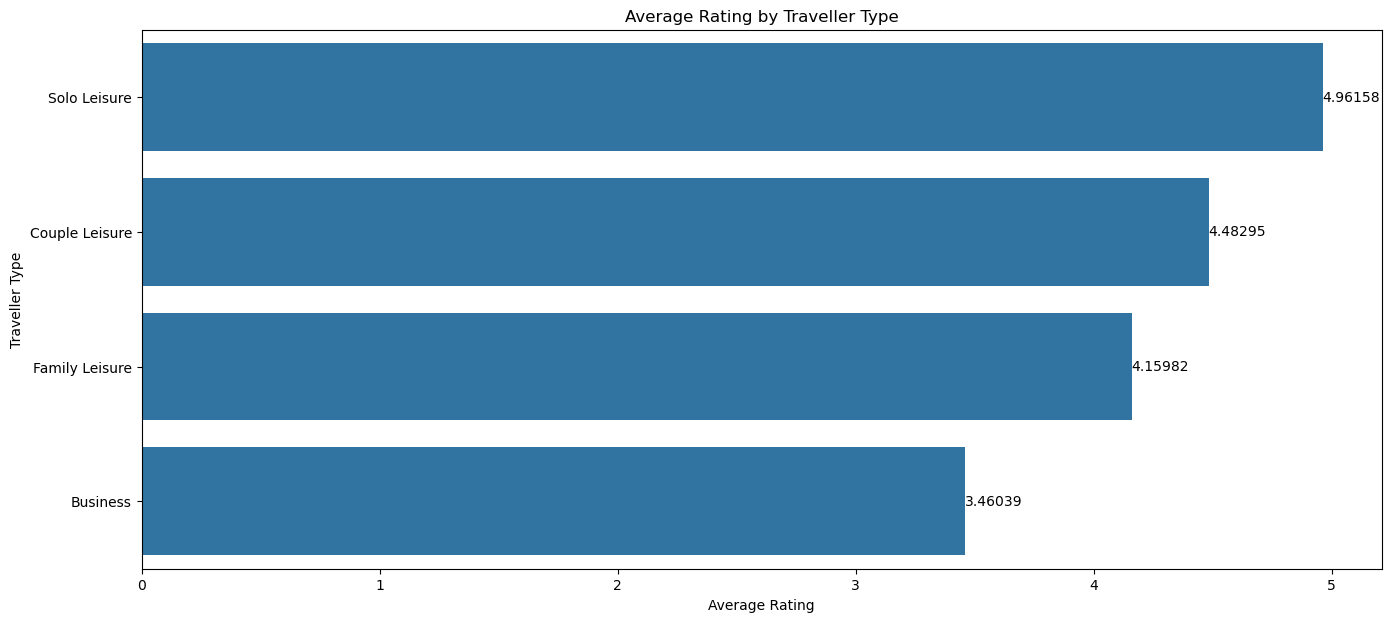

In [35]:
avg_rating_order = df.groupby('Traveller')['Rating'].mean().sort_values(ascending = False).index.values

# Use the .subplots() command to create a figure and subplots (all the plots that fit in a figure).

fig, ax = plt.subplots(1, 1, figsize=(16, 7))

# Use the .barplot() command to create a bar plot.
# Use the .set() command to create a title and x and y axis labels.

sns.barplot(data = df, 
            x = 'Rating', 
            y = 'Traveller', 
            errorbar = None, 
            order = avg_rating_order).set(title = 'Average Rating by Traveller Type', 
                                         xlabel = 'Average Rating', 
                                         ylabel = 'Traveller Type')

# Use the .bar_label() command to add labels to each bar.

ax.bar_label(ax.containers[0])

plt.show()

The highest rating a customer can give their overall experience is 10. The average rating for all traveller types is low. The traveller type with the highest average rating are passengers who are travelling solo for leisure. The traveller type with the lowest average rating are passengers who are travelling for business.

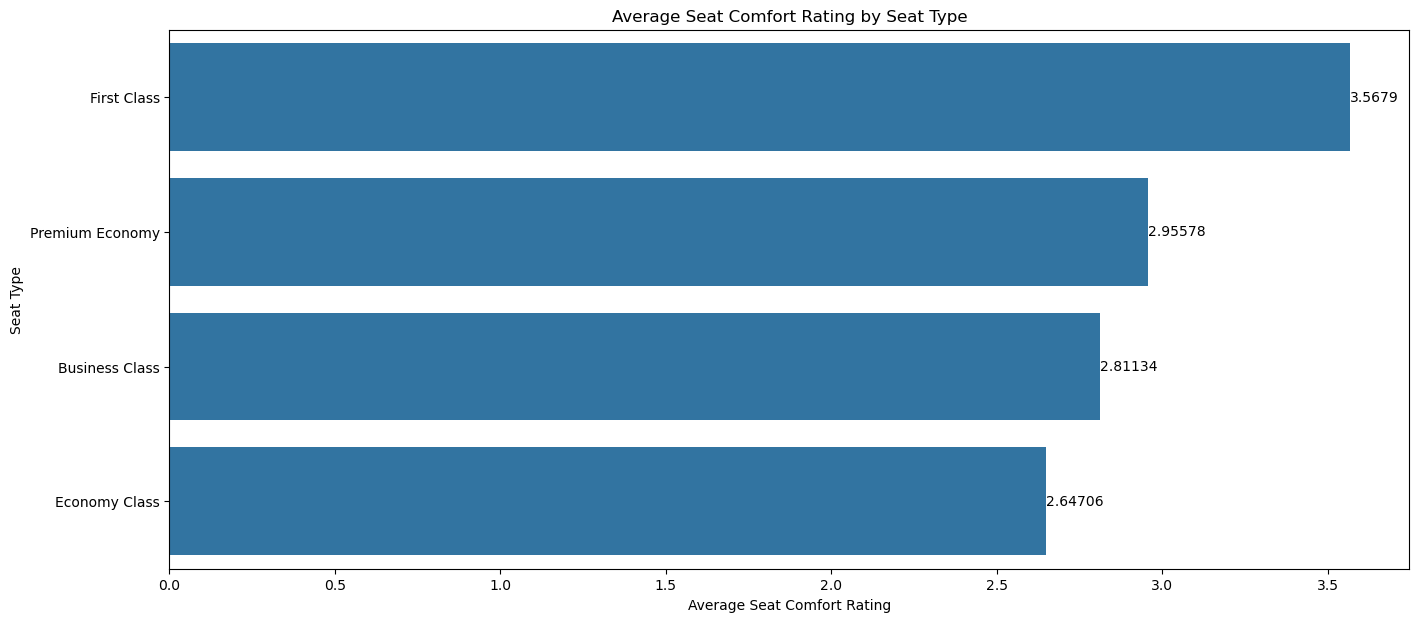

In [37]:
avg_seat_comfort_order = df.groupby('Seat_Type')['Seat_Comfort'].mean().sort_values(ascending = False).index.values

fig, ax = plt.subplots(1, 1, figsize=(16, 7))


sns.barplot(data = df, 
            x = 'Seat_Comfort', 
            y = 'Seat_Type', 
            errorbar = None, 
            order = avg_seat_comfort_order).set(title = 'Average Seat Comfort Rating by Seat Type', 
                                                xlabel = 'Average Seat Comfort Rating', 
                                                ylabel= 'Seat Type')

ax.bar_label(ax.containers[0])

plt.show()

The First Class seating has the highest average score of 3.6 out of 5. The Economy Class seats have the lowest average score of 2.7. British Airway's travel class, from least premium to most premium are Economy, Premium Economy, Business, and First Class. The fact that the average seat comfort for Business class is lower than Premium Economy may be part of the reason why passengers who travel for business give their trips a low rating.

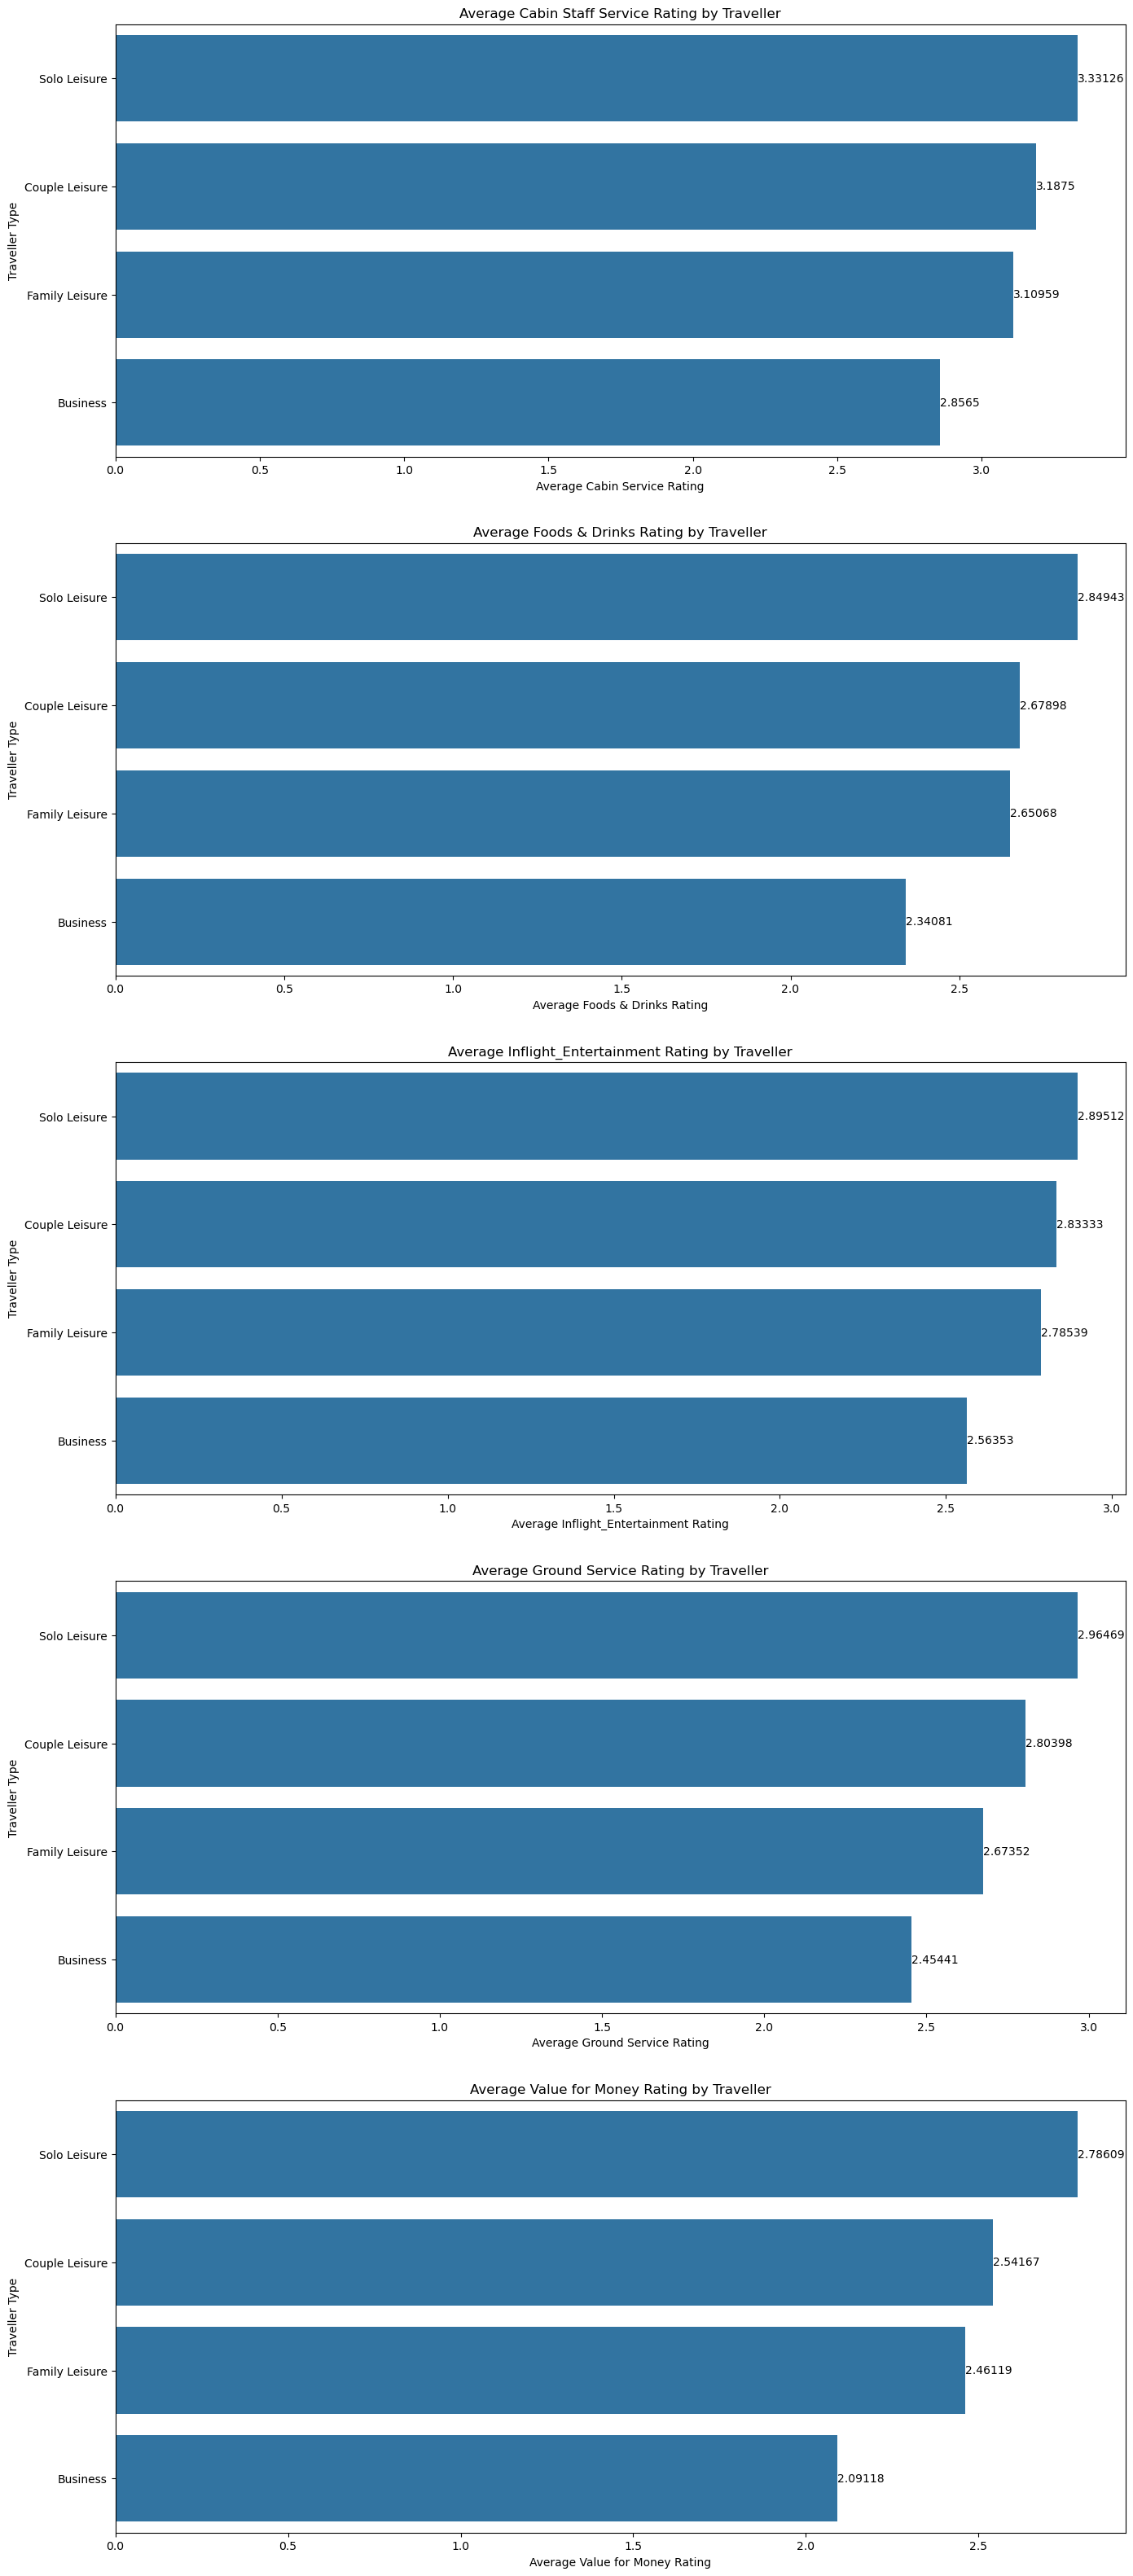

In [39]:
avg_cabin_service_order = df.groupby('Traveller')['Cabin_Staff_Service'].mean().sort_values(ascending = False).index.values
avg_foods_drinks_order = df.groupby('Traveller')['Foods_&_Drinks'].mean().sort_values(ascending = False).index.values
avg_inflight_entertainment_order = df.groupby('Traveller')['Inflight_Entertainment'].mean().sort_values(ascending = False).index.values
avg_ground_service_order = df.groupby('Traveller')['Ground_Service'].mean().sort_values(ascending = False).index.values
avg_value_for_money_order = df.groupby('Traveller')['Value_for_Money'].mean().sort_values(ascending = False).index.values

fig, ax = plt.subplots(5, 1, figsize=(16, 40))


sns.barplot(ax = ax[0], 
            data = df, 
            x = 'Cabin_Staff_Service', 
            y = 'Traveller', 
            errorbar = None, 
            order = avg_cabin_service_order).set(title = 'Average Cabin Staff Service Rating by Traveller', 
                                                 xlabel = 'Average Cabin Service Rating', 
                                                 ylabel = 'Traveller Type')

sns.barplot(ax = ax[1], 
            data = df, 
            x = 'Foods_&_Drinks', 
            y = 'Traveller', 
            errorbar = None, 
            order = avg_foods_drinks_order).set(title = 'Average Foods & Drinks Rating by Traveller', 
                                                xlabel = 'Average Foods & Drinks Rating', 
                                                ylabel = 'Traveller Type')

sns.barplot(ax = ax[2], 
            data = df, 
            x = 'Inflight_Entertainment', 
            y = 'Traveller', 
            errorbar = None, 
            order = avg_foods_drinks_order).set(title = 'Average Inflight_Entertainment Rating by Traveller', 
                                                xlabel = 'Average Inflight_Entertainment Rating', 
                                                ylabel = 'Traveller Type')

sns.barplot(ax = ax[3], 
            data = df, 
            x = 'Ground_Service', 
            y = 'Traveller', 
            errorbar = None, 
            order = avg_ground_service_order).set(title = 'Average Ground Service Rating by Traveller', 
                                                  xlabel = 'Average Ground Service Rating', 
                                                  ylabel = 'Traveller Type')

sns.barplot(ax = ax[4], 
            data = df, 
            x = 'Value_for_Money', 
            y = 'Traveller', 
            errorbar = None, 
            order = avg_value_for_money_order).set(title = 'Average Value for Money Rating by Traveller', 
                                                   xlabel = 'Average Value for Money Rating', 
                                                   ylabel = 'Traveller Type')

ax[0].bar_label(ax[0].containers[0])
ax[1].bar_label(ax[1].containers[0])
ax[2].bar_label(ax[2].containers[0])
ax[3].bar_label(ax[3].containers[0])
ax[4].bar_label(ax[4].containers[0])

plt.show()

In all categories (Cabin Staff Service, Foods and Drinks, Inflight Entertainment, Ground Service, and Value for Money), passengers who travel solo for leisure rate their experience the highest. Passengers who travel for business rate their experience the lowest for all categories. It is possible that passengers who travel solo for leisure may be looking forward to their destination and are more forgiving of any negative experience during their travel. Passengers who are travelling for business have more stress about going to their destination and may be more inclined to rate their experience negatively.

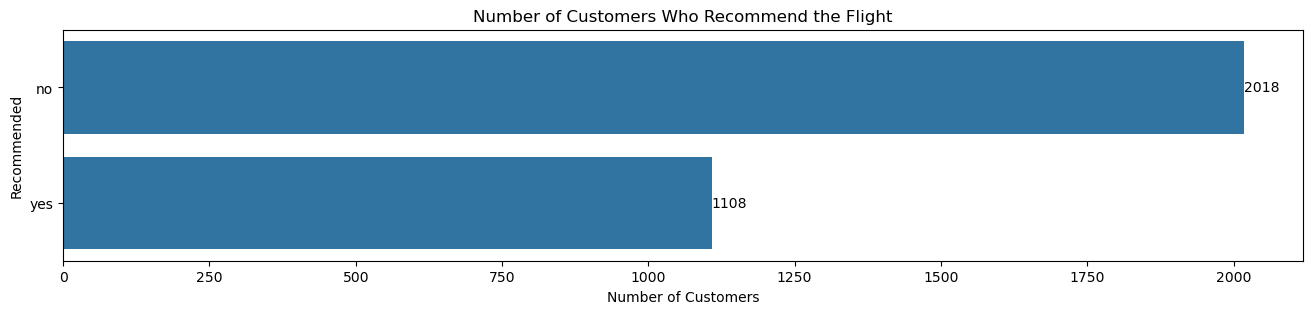

In [41]:
# Use the .subplots() command to create a figure and subplots (all the plots that fit in a figure).

fig, ax = plt.subplots(1, 1, figsize=(16, 3))

# Use the .barplot() command to create a bar plot.
# Use the .set() command to create a title and x and y axis labels.

sns.countplot(data = df, 
              y = 'Recommended').set(title = 'Number of Customers Who Recommend the Flight', 
                                     xlabel = 'Number of Customers', 
                                     ylabel = 'Recommended')

# Use the .bar_label() command to add labels to each bar.

ax.bar_label(ax.containers[0])

plt.show()

Most customers do not recommend their flight with British Airways and are unlikely to make future trips with British Airways. Approximately 65% of customers are not satisfied with their experience.

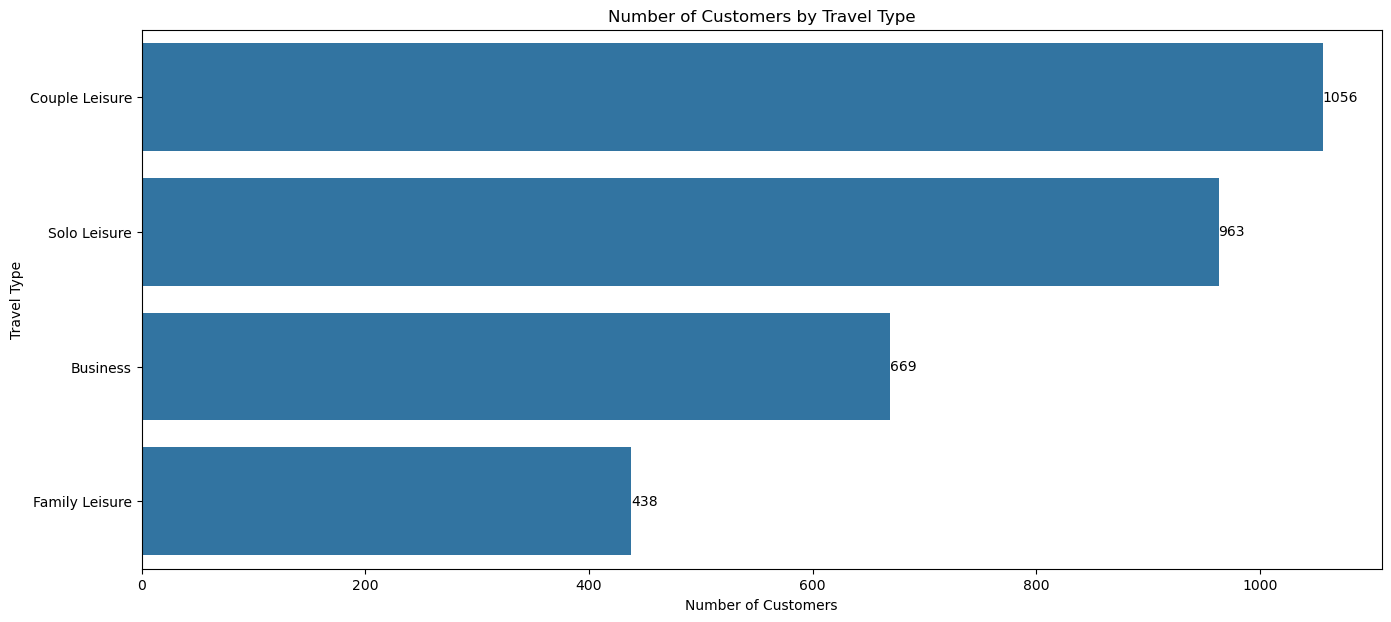

In [43]:
traveller_count_order = df.groupby('Traveller')['Traveller'].count().sort_values(ascending = False).index.values

# Use the .subplots() command to create a figure and subplots (all the plots that fit in a figure).

fig, ax = plt.subplots(1, 1, figsize=(16, 7))

# Use the .barplot() command to create a bar plot.
# Use the .set() command to create a title and x and y axis labels.

sns.countplot(data = df, 
              y = 'Traveller', 
              order = traveller_count_order).set(title = 'Number of Customers by Travel Type', 
                                                 xlabel = 'Number of Customers', 
                                                 ylabel = 'Travel Type')

# Use the .bar_label() command to add labels to each bar.

ax.bar_label(ax.containers[0])

plt.show()

Customers who are travelling solo or as a couple for leisure make up the majority. Customers who are travelling as a couple for leisure make up 33.78% of the total customers. Customers who are travelling solo for leisure make up 30.81% of the total customers. Customers who are travelling for business make up 21.40% of the total. Customers who are travelling with family for leisure make up 14.01% of the total.

Customers who are travelling for leisure (solo, as a couple, or as a family) have shown greater satisfaction with their trip than customers who are travelling for business. Customers who are travelling for business make up a significant portion of the total customer base (21.40%) and improving their experience may help improve British Airway's rating and number of recommendations from customers.

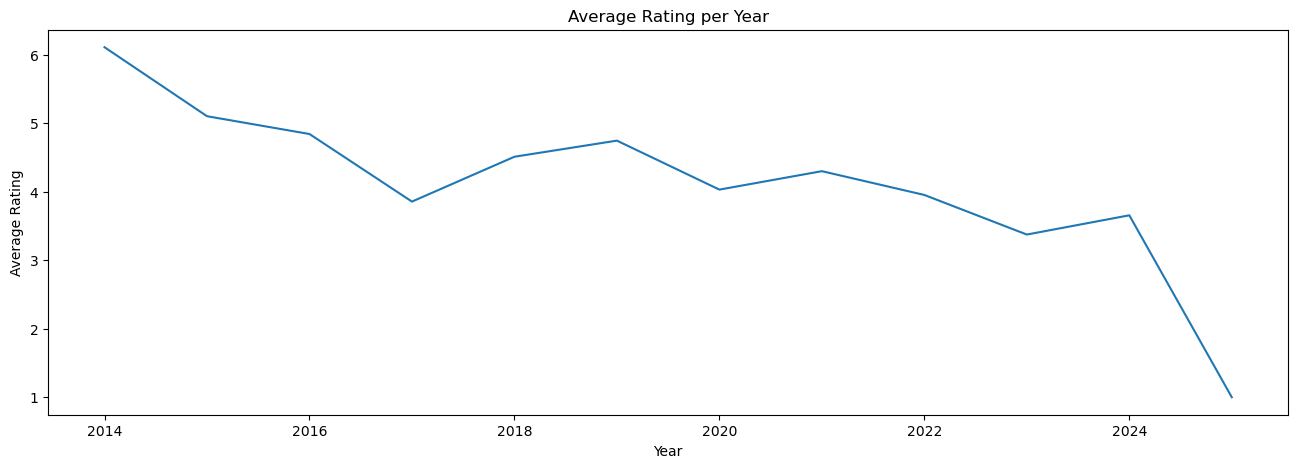

In [45]:
 fig, ax = plt.subplots(1, 1, figsize=(16, 5))

sns.lineplot(data = df, 
             x = 'Year_Flown', 
             y = 'Rating', 
             errorbar = None).set(title = 'Average Rating per Year', 
                               xlabel = 'Year', 
                               ylabel = 'Average Rating')

plt.show()

The year with the highest average rating is 2014. The average rating decreases until it reaches a low point in 2017. In the year 2017, British Airways experienced an IT failure caused by a power supply issue. This may explain the low average rating in 2017. The lowest point in average rating is the year 2025.

In [47]:
df["Year_Flown"].value_counts()

Year_Flown
2016    563
2017    559
2015    473
2018    338
2019    336
2023    277
2022    216
2024    166
2020     94
2021     93
2014      9
2025      2
Name: count, dtype: int64

The number of reviews per year may have caused some bias in the average rating. The year 2014 has only 9 ratings and 1 really high value may skew the average. The year 2025 only has 2 ratings and can be omitted.

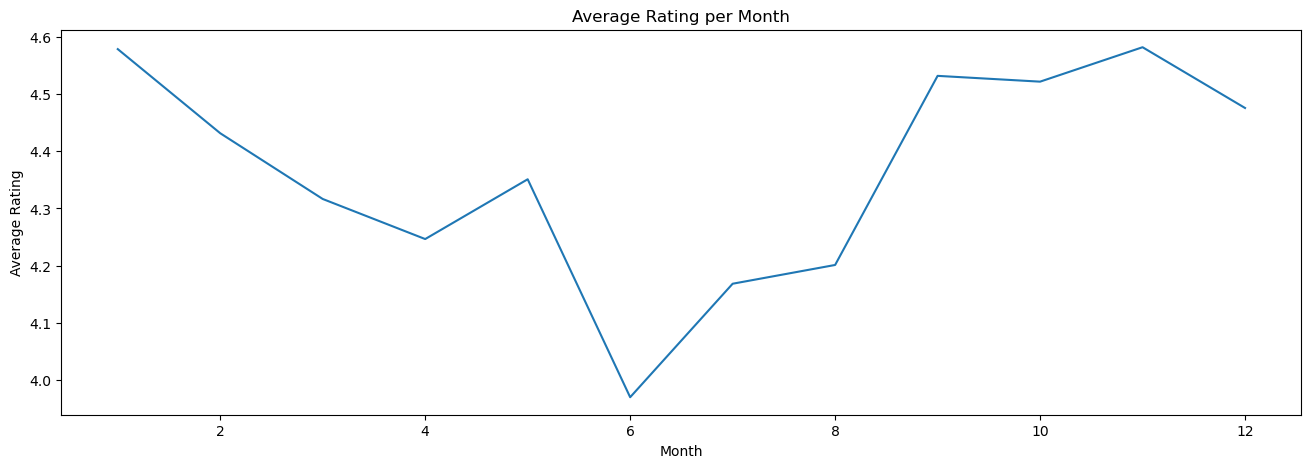

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(16, 5))

sns.lineplot(data = df, 
             x = 'Month_Flown', 
             y = 'Rating', 
             errorbar = None).set(title = 'Average Rating per Month', 
                               xlabel = 'Month', 
                               ylabel = 'Average Rating')

plt.show()

The highest average ratings tend to occur from September to January. Customers who travel from September to January may be travelling primarily for holidays. The month of June shows the lowest average rating.

In [51]:
df["Month_Flown"].value_counts()

Month_Flown
10    303
9     301
8     288
11    282
6     271
12    265
3     259
7     255
5     245
1     230
4     223
2     204
Name: count, dtype: int64

The number of reviews by months is distributed fairly evenly. There are no outlier values so the average rating per month should be fairly accurate.

### Sentiment Analysis
Senitment analysis is the identification and categorization of opinion expressed in text in order to determine if the customer's view on their experience is poisitive, negative, or neutral. Sentiment analysis can offer valuable insight on customer's satisfaction and whether they will continue with our service or recommend our service to other customers.

In [54]:
# Import the VADER Sentiment library.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [55]:
SentimentIntensityAnalyzer().polarity_scores("So no one told you life was gonna be this way"
                                             "Your job's a joke, you're broke, your love life's D.O.A."
                                             "It's like you're always stuck in second gear"
                                             "When it hasn't been your day, your week, your month, or even your year"
                                             "But"
                                             "I'll be there for you"
                                             "when the rain starts to pour"
                                             "I'll be there for you"
                                             "like I've been there before"
                                             "I'll be there for you"
                                             "cause you're there for me to")

{'neg': 0.096, 'neu': 0.787, 'pos': 0.117, 'compound': 0.3832}

The SentimentIntensityAnalyzer().polarity_scores() command will analyze the text inside the polarity_scores() and will rate the negativity, neutrality, and positivity of the text. The values go from -1 to 1, with -1 being a very negative statement and 1 being a very positive one. A value of 0 is neutral. The compound score is the overall score of the text.

In [57]:
# Sentiment analysis requires text data.
# Two columns from the original df dataframe contains text: the Title column and the Text column.

df_title = df["Title"]
df_text = df["Text"]

In [58]:
# The Title column has quotations.
# Use the .ste.replace() command to remove quotations.

df_title = df_title.str.replace('"', "")

In [59]:
# Combine df_title and df_text.
# Add a period and a space after df_title.

df_review = df_title + ". " + df_text

In [60]:
def sentiment(text):
    analysis = SentimentIntensityAnalyzer().polarity_scores(text)['compound']

    if analysis > 0.25:
        return 'Positive'
    elif analysis < -0.25:
        return 'Negative'
    else:
        return 'Neutral'

sentimental = df_review.apply(sentiment)
sentiment_count = sentimental.value_counts()

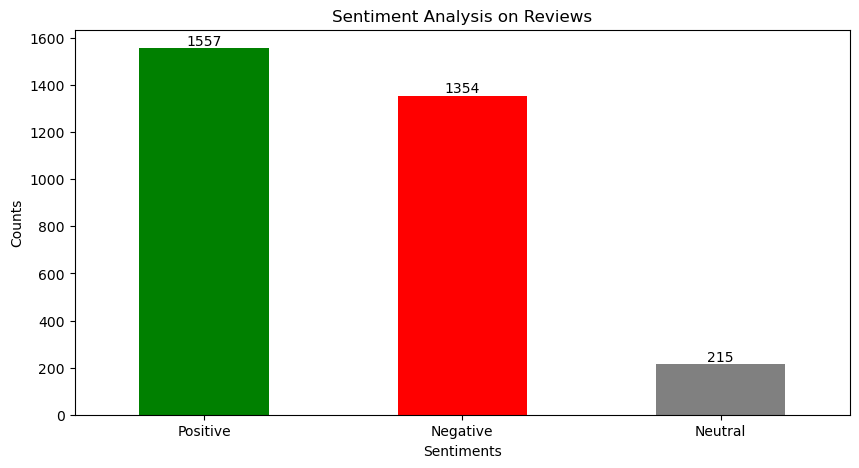

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

sentiment_count.plot(kind = 'bar', 
                     color = ['green','red','grey'], 
                     title = "Sentiment Analysis on Reviews")
plt.xlabel('Sentiments')
plt.xticks(rotation = 0)
plt.ylabel('Counts')

ax.bar_label(ax.containers[0])

plt.show()

Out of the 3126 reviews in the df dataframe, 49.81% are considered positive, 43.31% are considered negative, and 6.88% are considered neutral. Although the average rating score for all types of travellers are low (3.46 to 4.96), over half of the reviews are considered positive. Perhaps reviewers frequently mention positive aspects of their trip despite the lower rating.

### Word Cloud
Word clouds are visual representation of how often certain words are used. The bigger and bolder the word, the more often that word is mentioned in the text. Word clouds may offer insight on what subjects and topics are most important to customers.

In [64]:
# Import libraries that involve wordcloud.

from wordcloud import WordCloud, STOPWORDS

In [65]:
# Use the .str.cat() command to concatenate string values in a dataframe.
# df_reviews have only 1 column and all data are string.
# df_review.str.cat() will concatenate every row in df_reviews together.

reviews = df_review.str.cat(sep = " ")

In [66]:
# Stopwords are words that are used frequently but do not convey much information (a, the, of, and, etc.)
# Remove words that pertain to British Airway since most reviews will include the name of the Airline.

stopwords = set(STOPWORDS)
new_words = ["British", 
             "Airway", 
             "Airways", 
             "BA", 
             "flight", 
             "flights", 
             "airline", 
             "aircraft", 
             "fly", 
             "plane", 
             "London", 
             "Heathrow", 
             "London Heathrow", 
             "LHR", 
             "airport"]

# Use the .union() command to combine the word in stopwords with the words in new_words.

new_stopwords = stopwords.union(new_words)

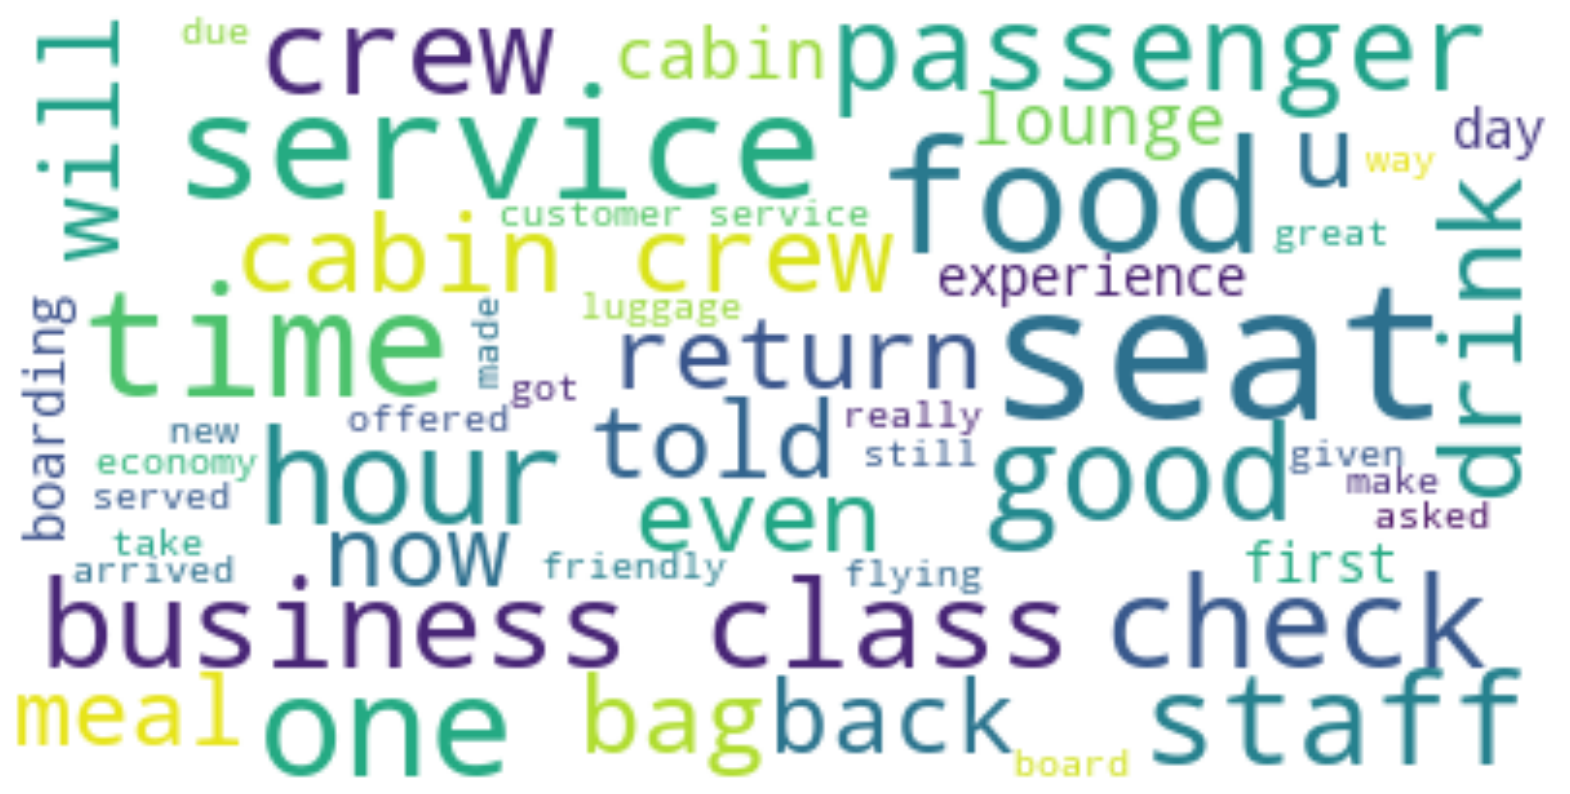

In [67]:
# Create a wordcloud for the reviews overall.

plt.rcParams["figure.figsize"] = (20, 20)

wordcloud = WordCloud(max_font_size = 50, 
                      min_font_size = 1, 
                      max_words = 50, 
                      background_color = 'white', 
                      stopwords = new_stopwords).generate(reviews)

plt.plot()
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

The 10 largest words in the wordcloud includes "seat", "food", "time", "service", "one", "good", "hour", "check", "staff", and "business class". Based on the words in the word cloud, customers seem to prioritize seat comfort, food and drink quality, crew/staff service, how their time is being spent, and baggage and check in. The term business class shows up frequently more than any other travel class. Positive words show up frequently as well such as "good", "great", and "friendly". It is possible that certain words such as "food" may be considered positive to our sentiment analysis but reviews that contain the word food may be negative. This could explain why our sentiment analysis detects a high percentage of positive reviews but our average ratings are low and why the majority of customers do not recommend their flight.